In [1]:
%matplotlib inline
# Importing libs
import rosbag
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

plt.rcParams["animation.html"] = "html5"


debug = True

In [7]:
os.getcwd()
base_path = "/home/paulo/Projects/IC_SLAM_pipelines/"
if(debug):
    bag_path = "experiment_data_debug"
else: 
    bag_path = "experiment_data"
os.chdir("{}/{}/bags".format(base_path, bag_path))
# os.chdir('/home/paulo/Projects/turtlebot_SLAM/rtabmap_dbs')

print(os.getcwd())
os.listdir(".")
# bag_names = glob.glob("bag-d*")
bag_names = glob.glob("*.bag")

print(bag_names)

# to copy output: maintain the cursor focus on the same cell you'll copy the output, then it'll works

/home/paulo/Projects/IC_SLAM_pipelines/experiment_data_debug/bags
['bag-direita-120-1080-40-slam.bag', 'bag-direita-120-1080-40-localization.bag', 'bag-esquerda-120-1080-40-localization.bag', 'bag-esquerda-120-1080-40-slam.bag']


In [8]:
# load the bag data:

bag = rosbag.Bag(bag_names[0])
# bag = rosbag.Bag(bag_names[/])
topics = bag.get_type_and_topic_info()[1].keys()
types = []
for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
    types.append(bag.get_type_and_topic_info()[1].values()[i][0])
print(types)
print(topics)

['geometry_msgs/PoseStamped', 'nav_msgs/Odometry', 'tf2_msgs/TFMessage']
['/openvslam/camera_pose', '/openvslam/odometry', '/tf']


# I love VSCode

In [9]:
print(bag)
print(type(bag))
bag.get_type_and_topic_info(topics[0])

path:        bag-direita-120-1080-40-slam.bag
version:     2.0
duration:    8.0s
start:       Sep 11 2021 15:10:41.35 (1631383841.35)
end:         Sep 11 2021 15:10:49.32 (1631383849.32)
size:        96.4 KB
messages:    223
compression: none [1/1 chunks]
types:       geometry_msgs/PoseStamped [d3812c3cbc69362b77dc0b19b345f8f5]
             nav_msgs/Odometry         [cd5e73d190d741a2f92e81eda573aca7]
             tf2_msgs/TFMessage        [94810edda583a504dfda3829e70d7eec]
topics:      /openvslam/camera_pose   75 msgs @ 9.4 Hz : geometry_msgs/PoseStamped
             /openvslam/odometry      75 msgs @ 9.4 Hz : nav_msgs/Odometry        
             /tf                      73 msgs @ 9.4 Hz : tf2_msgs/TFMessage
<class 'rosbag.bag.Bag'>


TypesAndTopicsTuple(msg_types={'geometry_msgs/PoseStamped': 'd3812c3cbc69362b77dc0b19b345f8f5', 'nav_msgs/Odometry': 'cd5e73d190d741a2f92e81eda573aca7', 'tf2_msgs/TFMessage': '94810edda583a504dfda3829e70d7eec'}, topics={'/openvslam/camera_pose': TopicTuple(msg_type='geometry_msgs/PoseStamped', message_count=75, connections=1, frequency=9.398231853304996)})

In [16]:
trajectory = []
for topic, msg, t in bag.read_messages(topics=topics[0]):# original é zero
    print(msg)
    trajectory.append(msg.pose)

header: 
  seq: 0
  stamp: 
    secs: 1631383841
    nsecs: 352915616
  frame_id: "map"
pose: 
  position: 
    x: nan
    y: nan
    z: nan
  orientation: 
    x: nan
    y: nan
    z: nan
    w: nan
header: 
  seq: 1
  stamp: 
    secs: 1631383841
    nsecs: 538688979
  frame_id: "map"
pose: 
  position: 
    x: 0.0796801575408
    y: 0.00439665898147
    z: -0.00694999204283
  orientation: 
    x: 0.00380089544518
    y: 0.000782746021709
    z: -4.22513499967e-05
    w: 0.99999246933
header: 
  seq: 2
  stamp: 
    secs: 1631383841
    nsecs: 665006598
  frame_id: "map"
pose: 
  position: 
    x: 0.132009504969
    y: 0.00736208413836
    z: -0.0108912382803
  orientation: 
    x: 0.00283055601589
    y: 0.00135297644756
    z: -0.000896319089921
    w: 0.999994676996
header: 
  seq: 3
  stamp: 
    secs: 1631383841
    nsecs: 781104447
  frame_id: "map"
pose: 
  position: 
    x: 0.165731403805
    y: 0.00912465172026
    z: -0.0133692813175
  orientation: 
    x: 0.00150837439816

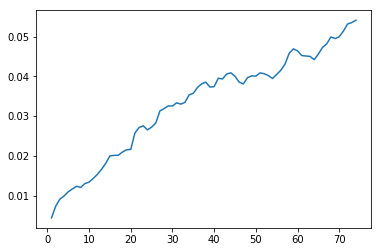

In [12]:
time = range(0,len(trajectory))

x = [trajectory[i].position.x for i in range(len(trajectory)) ]
y = [trajectory[i].position.y for i in range(len(trajectory)) ]
z = [-trajectory[i].position.z for i in range(len(trajectory)) ]

plt.plot(time, y)
# print(y)

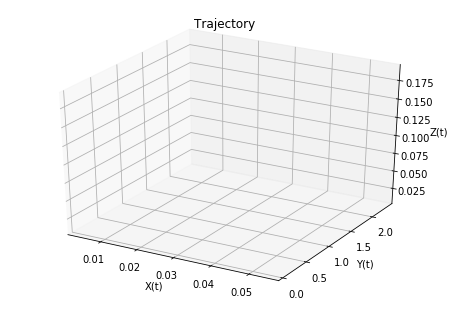

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation

# ANIMATION FUNCTION


def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])
    line.set_3d_properties(dataSet[2, :num])
    return line


# THE DATA POINTS
# t = np.arange(0, 20, 0.2)  # This would be the z-axis ('t' means time here)
# x = np.cos(t)-1
# y = 1/2*(np.cos(2*t)-1)

dataSet = np.array([y, x, z])
numDataPoints = len(z)

# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)

# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2],
                lw=2, c='g')[0]  # For line plot

# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trajectory ')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(
    dataSet, line), interval=50, blit=False)
# line_ani.save(r'AnimationNew.mp4')

# plt.show()
from IPython.display import HTML
HTML(line_ani.to_jshtml())

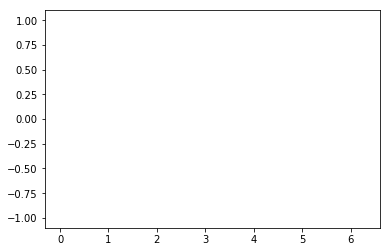

In [ ]:
# import matplotlib.pyplot as plt
# plt.rcParams["animation.html"] = "html5"
# import matplotlib.animation
# import numpy as np

# t = np.linspace(0,2*np.pi)
# x = np.sin(t)

# fig, ax = plt.subplots()
# l, = ax.plot([0,2*np.pi],[-1,1])

# animate = lambda i: l.set_data(t[:i], x[:i])

# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))